In [1]:
pip install tensorflow==2.15.1 ktrain

  Using cached tensorflow-2.15.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached ktrain-0.41.4.tar.gz (25.3 MB)
  Preparing metadata (setup.py) ... done
  Using cached ml_dtypes-0.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (20 kB)
  Using cached wrapt-1.14.1-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
  Using cached tensorboard-2.15.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached tensorflow_estimator-2.15.0-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached langdetect-1.0.9.tar.gz (981 kB)
  Preparing metadata (setup.py) ... done
  Using cached syntok-1.4.4-py3-none-any.whl.metadata (10 kB)
  Using cached tika-2.6.0.tar.gz (27 kB)
  Preparing metadata (setup.py) ... done
  Using cached keras-bert-0.89.0.tar.gz (25 kB)
  Preparing metadata (setup.py) ... done
  Using cached W

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import ktrain
from ktrain import text

In [7]:
# with open('/content/SMSSpamCollection','r') as file:
#     text = file.readlines()

In [8]:
df = pd.read_csv('/content/SMSSpamCollection', sep='\t',  names=['label', 'text'])
df

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
df.shape

(5572, 2)

In [10]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(df, test_size=0.2, random_state=0)

In [11]:
data_train.shape

(4457, 2)

Prepare the data

In [12]:
from sklearn.model_selection import train_test_split
(X_train,y_train), (X_test,y_test), preproc = text.texts_from_df(train_df=data_train,
                                                               text_column='text',
                                                               label_columns='label',
                                                               val_df=data_test,
                                                            preprocess_mode = 'bert') # distilbert

['ham', 'spam']
      ham  spam
1114  1.0   0.0
3589  1.0   0.0
3095  1.0   0.0
1012  1.0   0.0
3320  1.0   0.0
['ham', 'spam']
      ham  spam
4456  1.0   0.0
690   0.0   1.0
944   1.0   0.0
3768  1.0   0.0
1189  1.0   0.0
downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


In [13]:
data_train.shape

(4457, 2)

In [14]:
X_train

[array([[  101,  2053,  1045, ...,     0,     0,     0],
        [  101,  2065,  2017, ...,     0,     0,     0],
        [  101,  2031,  2017, ...,     0,     0,     0],
        ...,
        [  101,  2005, 24471, ...,     0,     0,     0],
        [  101,  1054,  1057, ...,     0,     0,     0],
        [  101,  3461,  3110, ...,     0,     0,     0]]),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])]

In [15]:
len(X_train)

2

In [16]:
## use 'distilbert' if you want
model = text.text_classifier(name='bert', # or distilbert
                             train_data=(X_train, y_train),
                             preproc=preproc)

Is Multi-Label? False
maxlen is 400


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


In [17]:
type(model)

keras.src.engine.functional.Functional

In [18]:
#here we have taken batch size as 6 as from the documentation it is
# recommend to use this with maxlen as 500
learner = ktrain.get_learner(model=model, train_data=(X_train, y_train),
                             val_data = (X_test, y_test),
                             batch_size = 6)

In [19]:
learner

simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/2
743/743 [==============================] - 470s 603ms/step - loss: 0.3331 - accuracy: 0.7952
Epoch 2/2
743/743 [==============================] - 184s 247ms/step - loss: 1.9570 - accuracy: 0.7996


done.
Visually inspect loss plot and select learning rate associated with falling loss


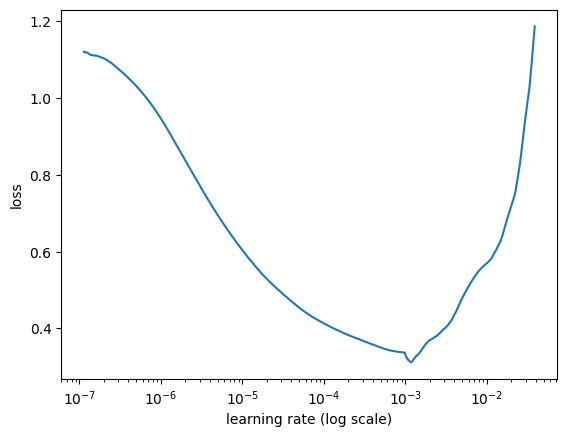

In [20]:
learner.lr_find(show_plot=True, max_epochs=2)

In [23]:
# learner.fit_onecycle(lr = 2e-5, epochs = 1)    #use to predict on new data
# predictor = ktrain.get_predictor(learner.model, preproc)
# predictor.save('bertspam--classifier')

In [22]:
learner.fit_onecycle(lr = 10e-3, epochs = 1)    #use to predict on new data
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.save('bertspam--classifier')



begin training using onecycle policy with max lr of 0.01...
743/743 [==============================] - 518s 670ms/step - loss: 0.5784 - accuracy: 0.8335 - val_loss: 0.4455 - val_accuracy: 0.8565


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
file = open('sample.csv')
lines = file.readlines()

In [26]:
predictor.predict(lines[0])   #directly data is passed through predictor

'ham'

In [27]:
 predictor.predict(lines[1])

'ham'